In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## **Problem Statement: To predict the median house value for california districts**

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
data.target_names

['MedHouseVal']

In [6]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
df = pd.DataFrame(data.data , columns = data.feature_names)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [17]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


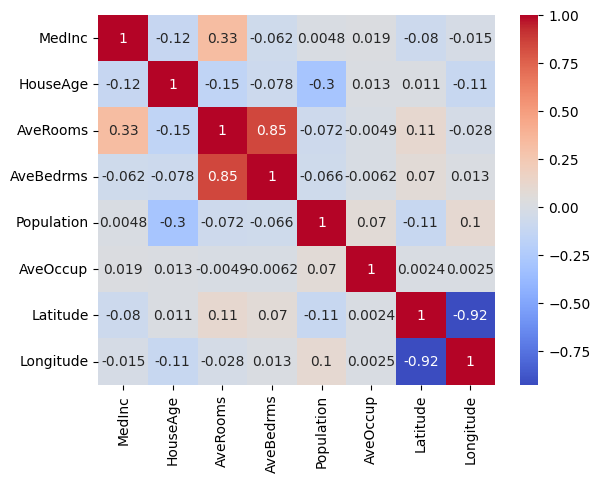

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### **'iloc[]':**

df.iloc[rows, columns]

In [26]:
X = df.iloc[:, :-1]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [28]:
y = df.iloc[:,-1]
y

,Longitude
0,-122.23
1,-122.22
2,-122.24
3,-122.25
4,-122.25
...,...
20635,-121.09
20636,-121.21
20637,-121.22
20638,-121.32


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((16512, 7), (4128, 7), (16512,), (4128,))

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
scaler

StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.36232605,  1.85890297, -0.16877334, ..., -0.4861138 ,
         0.00190139,  0.97229046],
       [-0.14102329,  1.06434823, -0.20665523, ..., -0.40424308,
         0.00945496,  1.08459626],
       [-0.66144956, -1.0014941 ,  1.10658361, ..., -1.25053723,
         0.02055372,  1.06119922],
       ...,
       [-1.45044201,  1.06434823, -0.21055978, ..., -0.57866332,
        -0.03879603, -0.79652586],
       [-0.65764311, -1.47822694, -0.17198179, ..., -0.09099855,
        -0.02771272, -0.89011402],
       [-0.83136525,  0.50815991, -0.31396782, ..., -0.37042691,
        -0.04378624,  1.00972573]])

In [35]:
X_test

array([[-0.33102858,  0.82598181, -0.35885058, ..., -0.28143698,
        -0.11362606, -0.73569355],
       [-1.0032899 ,  0.66707086, -0.173141  , ..., -0.25118041,
        -0.04185389,  0.53710549],
       [ 0.0724551 ,  1.38217013, -0.36761594, ...,  0.09677018,
         0.05892484,  0.98164928],
       ...,
       [ 0.61952652, -0.20693936, -0.16877334, ..., -1.25854632,
         0.04929666,  0.92081697],
       [ 0.52806599,  1.06434823, -0.03563168, ..., -0.53060876,
        -0.00503065, -0.72165533],
       [-0.61894421,  1.85890297,  0.11482041, ..., -0.46297642,
        -0.01755593, -0.76844941]])

# **Model Training:**

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [37]:
model

LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
model.coef_

array([-0.39188858, -0.20681361,  0.52193977, -0.32767262, -0.0541704 ,
        0.02692015, -1.92446378])

In [40]:
model.intercept_

np.float64(-119.57428839631783)

In [41]:
model.predict(X_train)

array([-121.6944014 , -121.82005008, -120.87070613, ..., -117.71277139,
       -117.28793363, -121.49170531])

In [42]:
model.predict(X_test)

array([-118.35796169, -120.39132647, -121.91681924, ..., -121.5005917 ,
       -118.57606014, -118.12765854])

# **Performance Metrics:**

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, model.predict(X_train))
mae

0.48859868753109853

In [44]:
mse = mean_squared_error(y_train, model.predict(X_train))
mse

0.4449968916667113

In [45]:
r2 = r2_score(y_train, model.predict(X_train))
r2

0.889582327809119

In [47]:
adj_r2 = 1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1])

adj_r2

0.8895421880918729

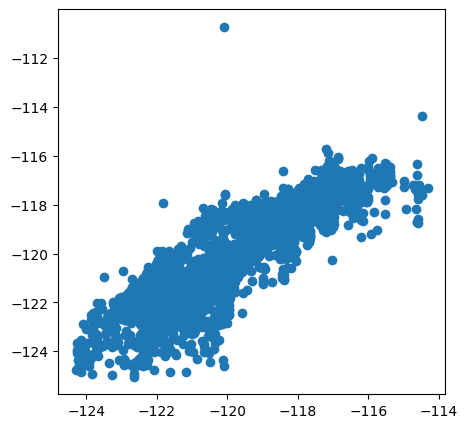

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, model.predict(X_train))
plt.show()

In [50]:
error = y_train - model.predict(X_train)
error

,Longitude
15961,-0.735599
1771,-0.529950
16414,-0.369294
5056,-0.166385
8589,0.337662
...,...
10955,-0.362680
17289,-0.314544
5192,-0.547229
12172,0.127934


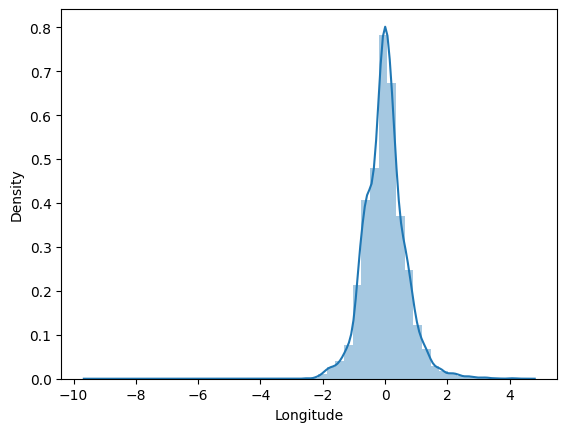

In [51]:
sns.distplot(error)
plt.show()

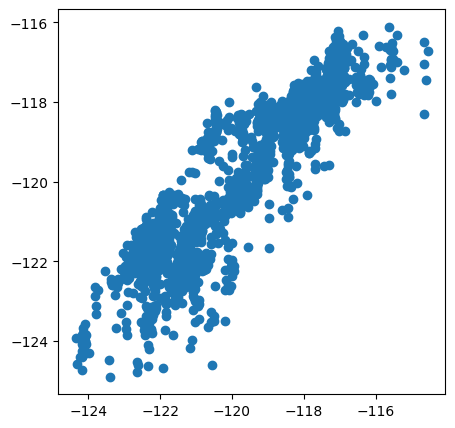

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, model.predict(X_test))
plt.show()